In [ ]:
import numpy as np
import pylab as plt

### Basic Method for L = 1 to 15

In [2]:
moves = [(0,1), (0,-1), (1,0), (-1,0)]

def count_saws(L):
    stack = [(0, 0, 0, set([(0, 0)]))]  # (x, y, Steps, Visited_set)
    saw_count = 0

    while stack:
        x, y, steps, visited = stack.pop()

        if steps == L:
            saw_count += 1
            continue

        for dx, dy in moves:
            new_x, new_y = x + dx, y + dy

            if (new_x, new_y) not in visited:
                new_visited = visited.copy()
                new_visited.add((new_x, new_y))
                stack.append((new_x, new_y, steps + 1, new_visited))

    return saw_count

saw_counts = []

for L in range(1, 21):
    count = count_saws(L)
    saw_counts.append(count)
    print(f"c{L} = {count}")

print("Saw counts for comparison:", saw_counts)

#35mins to run until L=20

c1 = 4
c2 = 12
c3 = 36
c4 = 100
c5 = 284
c6 = 780
c7 = 2172
c8 = 5916
c9 = 16268
c10 = 44100
c11 = 120292
c12 = 324932
c13 = 881500
c14 = 2374444
c15 = 6416596
c16 = 17245332
c17 = 46466676
c18 = 124658732
c19 = 335116620


KeyboardInterrupt: 

### Basic Monte Carlo I:

In [3]:
import numpy as np
import random

moves=[(0,1), (0,-1), (1,0), (-1,0)]

def estimate_saw_fraction(L, N):
    saw_count = 0
    for _ in range(N):
        x, y = 0, 0
        path = [(x, y)]

        for _ in range(L):
            dx, dy = moves[np.random.randint(0, 4)]  # Pick direction
            x, y = x + dx, y + dy

            if (x, y) in path:  # Check for overlap
                break
            path.append((x, y))
        else:
            saw_count += 1
    return saw_count / N

N=100_000
for L in range(1, 21):
    fraction = estimate_saw_fraction(L, N)
    print(f"L = {L}, Estimated SAW fraction: {fraction:.6f}")

L = 1, Estimated SAW fraction: 1.000000
L = 2, Estimated SAW fraction: 0.752300
L = 3, Estimated SAW fraction: 0.561000
L = 4, Estimated SAW fraction: 0.389960
L = 5, Estimated SAW fraction: 0.276600
L = 6, Estimated SAW fraction: 0.189960
L = 7, Estimated SAW fraction: 0.133940
L = 8, Estimated SAW fraction: 0.091190
L = 9, Estimated SAW fraction: 0.063380
L = 10, Estimated SAW fraction: 0.041420
L = 11, Estimated SAW fraction: 0.027760
L = 12, Estimated SAW fraction: 0.019470
L = 13, Estimated SAW fraction: 0.013130
L = 14, Estimated SAW fraction: 0.008440
L = 15, Estimated SAW fraction: 0.006260
L = 16, Estimated SAW fraction: 0.004170
L = 17, Estimated SAW fraction: 0.002850
L = 18, Estimated SAW fraction: 0.001660
L = 19, Estimated SAW fraction: 0.001260
L = 20, Estimated SAW fraction: 0.000730


### Basic Monte Carlo II:

In [ ]:
saw_counts = [4, 12, 36, 100, 284, 780, 2172, 5916, 16268, 44100, 120292, 324932, 881500, 2374444, 6416596, 17245332, 46466676, 124658732, 335116620, 897697164]

# mc method
def generate_saw(L):
    moves = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    path = [(0, 0)]
    visited = set(path)

    for _ in range(L):
        neighbors = [(path[-1][0] + dx, path[-1][1] + dy) for dx, dy in moves]
        valid_moves = [pos for pos in neighbors if pos not in visited]

        if valid_moves:
            next_step = random.choice(valid_moves)
            path.append(next_step)
            visited.add(next_step)
        else:
            # if no valid moves, stay in place for remaining steps
            path.extend([path[-1]] * (L-len(path)+1))
            break

    return path

def estimate_Cn(L, N):
    successful_walks = sum(1 for _ in range(N) if len(set(generate_saw(L))) == L+1)
    return (successful_walks/N, (successful_walks/N) * (4**L))

#  L = 1 to 20
for L in range(1, 21):
    count_iterative = saw_counts[L-1]

    # mc result
    N = 1_000_000
    prob, Cn_monte_carlo = estimate_Cn(L, N)
    theoretical_Cn = 2.6**L  # theoretical approx

    print(f"L = {L}:")
    print(f"  Probability = {prob}")
    print(f"  Iterative count (c{L}) = {count_iterative}")
    print(f"  Monte Carlo estimated C{L} = {Cn_monte_carlo}")
    print(f"  Theoretical C{L} = {theoretical_Cn}")
    print(f"  Monte Carlo Relative Error to Iterative count = {abs(Cn_monte_carlo - count_iterative) / count_iterative * 100:.2f}%")
    print(f"  Monte Carlo Relative Error to Theoretical CL = {abs(Cn_monte_carlo - theoretical_Cn) / theoretical_Cn * 100:.2f}%")
    print()


### Rosenbluth method

Estimating for L=330: 100%|██████████| 10000/10000 [00:00<00:00, 10118.92it/s]


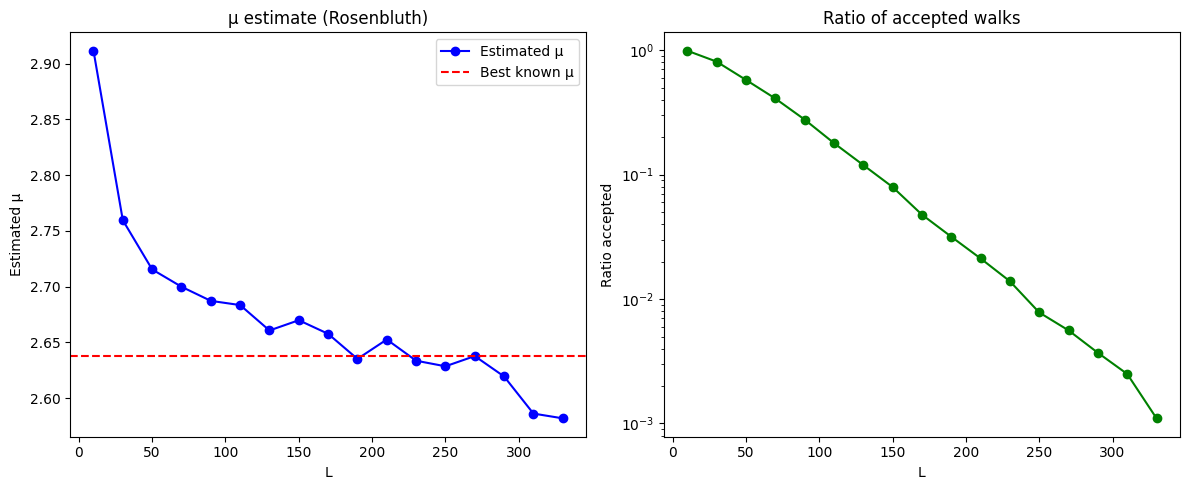

In [4]:
import random
import numpy as np
from tqdm import tqdm

# 2D lattice directions: up, down, left, right
directions = [(0, 1), (0, -1), (-1, 0), (1, 0)]

def add(pos1, pos2):
    return (pos1[0] + pos2[0], pos1[1] + pos2[1])

#Estimate c_L for each L
def generate_rosenbluth_walk(L):
    walk = [(0, 0)]
    visited = set(walk)
    weight = 1
    accepted = True

    for _ in range(L):
        # Find valid neighbors not yet visited
        candidates = [add(walk[-1], d) for d in directions if add(walk[-1], d) not in visited]
        n_choices = len(candidates)

        if n_choices == 0:
            # Dead end: path is rejected and L is not reached
            accepted = False
            break

        weight *= n_choices
        next_step = random.choice(candidates)
        walk.append(next_step)
        visited.add(next_step)

    return weight if accepted else 0, accepted

#accepted when SAW is not fully L length for each simulation for
#Acceptance ratio = fraction of walks that successfully reach length L without intersections
def estimate_mu(L, N):
    weights = []
    accepted_count = 0

    for _ in tqdm(range(N), desc=f"Estimating for L={L}"):
        w, accepted = generate_rosenbluth_walk(L)
        if accepted:
            accepted_count += 1
        weights.append(w)

    avg_weight = np.mean(weights)
    mu_estimate = avg_weight**(1 / L)
    acceptance_ratio = accepted_count / N
    return mu_estimate, acceptance_ratio

import matplotlib.pyplot as plt

L_values = list(range(10, 350, 20))
mu_vals = []
acceptance_rates = []

for L in L_values:
    mu, acc = estimate_mu(L, N=10000)
    mu_vals.append(mu)
    acceptance_rates.append(acc)

# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(L_values, mu_vals, 'bo-', label='Estimated μ')
plt.axhline(y=2.63815853032790, color='r', linestyle='--', label='Best known μ')
plt.xlabel("L")
plt.ylabel("Estimated μ")
plt.legend()
plt.title("μ estimate (Rosenbluth)")

plt.subplot(1, 2, 2)
plt.plot(L_values, acceptance_rates, 'go-')
plt.yscale('log')
plt.xlabel("L")
plt.ylabel("Ratio accepted")
plt.title("Ratio of accepted walks")

plt.tight_layout()
plt.show()

#high L, high variance in mu
#for max 350 L

### Averaged SMC

In [ ]:
import random
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from tqdm import tqdm

dirs = [(0,1), (0,-1), (1,0), (-1,0)]

def add(p, d):
    return (p[0] + d[0], p[1] + d[1])

def get_unvisited_neighbors(walk):
    visited = set(walk)
    head = walk[-1]
    return [add(head, d) for d in dirs if add(head, d) not in visited]

def resample(walks, weights, N):
    weights = np.array(weights)
    if weights.sum() == 0:
        return walks  # avoid division by zero
    weights = weights / weights.sum()
    indices = np.random.choice(len(walks), size=N, p=weights)
    return [walks[i][:] for i in indices]

def count_duplicates(walks):
    walk_tuples = [tuple(walk) for walk in walks]
    counter = Counter(walk_tuples)
    duplicates = {walk: count for walk, count in counter.items() if count > 1}
    return len(duplicates)

def pivot_move(walk):
    if len(walk) <= 2:
        return walk
    pivot_index = random.randint(1, len(walk) - 2)
    pivot_point = walk[pivot_index]
    direction = random.choice(["rotate90", "rotate270", "reflect_x", "reflect_y"])
    transformed = []

    for i in range(pivot_index + 1, len(walk)):
        dx = walk[i][0] - pivot_point[0]
        dy = walk[i][1] - pivot_point[1]
        if direction == "rotate90":
            new_dx, new_dy = -dy, dx
        elif direction == "rotate270":
            new_dx, new_dy = dy, -dx
        elif direction == "reflect_x":
            new_dx, new_dy = dx, -dy
        elif direction == "reflect_y":
            new_dx, new_dy = -dx, dy
        new_pos = (pivot_point[0] + new_dx, pivot_point[1] + new_dy)
        transformed.append(new_pos)

    new_walk = walk[:pivot_index + 1] + transformed
    if len(set(new_walk)) == len(new_walk):
        return new_walk
    return walk


def smc(N=10000, max_L=1000):
    walks = [[(0, 0)] for _ in range(N)]
    extension_ratios = []

    for L in tqdm(range(1, max_L+1), desc="Running SMC"):
        new_walks = []
        weights = []

        for walk in walks:
            candidates = get_unvisited_neighbors(walk)
            w = len(candidates)
            weights.append(w)

            if w > 0:
                step = random.choice(candidates)
                walk.append(step)
                new_walks.append(walk)
            else:
                new_walks.append(walk)

        walks = resample(new_walks, weights, N)

        # Apply pivoting to introduce diversity
        walks = [pivot_move(walk) for walk in walks]

        extension_ratios.append(np.mean(weights))

        if L > 500 and L % 100 == 0:
            num_duplicates = count_duplicates(walks)
            if num_duplicates > 0:
                print(f"[L={L}] Duplicate walks: {num_duplicates}")

    c_ratios = np.array(extension_ratios)
    mu_estimate = np.prod(c_ratios)**(1 / len(c_ratios))
    return mu_estimate, extension_ratios

mu, ratios = smc(N=10000, max_L=1000)
print(f"Estimated μ ≈ {mu:.5f}")


Running SMC:  60%|██████    | 600/1000 [07:12<09:30,  1.43s/it]

[L=600] Duplicate walks: 1616


Running SMC:  70%|███████   | 700/1000 [09:36<08:08,  1.63s/it]

[L=700] Duplicate walks: 1632


Running SMC:  80%|████████  | 800/1000 [12:17<06:00,  1.80s/it]

[L=800] Duplicate walks: 1661


Running SMC:  90%|█████████ | 900/1000 [15:18<03:23,  2.03s/it]

[L=900] Duplicate walks: 1736


Running SMC: 100%|█████████▉| 997/1000 [18:35<00:06,  2.15s/it]

### Multiple SMC

In [ ]:
import random
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from tqdm import tqdm

# Directions
dirs = [(0,1), (0,-1), (1,0), (-1,0)]

def add(p, d):
    return (p[0] + d[0], p[1] + d[1])

# Unvisited neighbors
def get_unvisited_neighbors(walk):
    visited = set(walk)
    head = walk[-1]
    return [add(head, d) for d in dirs if add(head, d) not in visited]

# Resampling based on weights
def resample(walks, weights, N):
    weights = np.array(weights)
    if weights.sum() == 0:
        return walks  # avoid division by zero
    weights = weights / weights.sum()
    indices = np.random.choice(len(walks), size=N, p=weights)
    return [walks[i][:] for i in indices]

# Optional: count duplicates (debugging)
def count_duplicates(walks):
    walk_tuples = [tuple(walk) for walk in walks]
    counter = Counter(walk_tuples)
    duplicates = {walk: count for walk, count in counter.items() if count > 1}
    return len(duplicates)

# Pivot move for diversity
def pivot_move(walk):
    if len(walk) <= 2:
        return walk
    pivot_index = random.randint(1, len(walk) - 2)
    pivot_point = walk[pivot_index]
    direction = random.choice(["rotate90", "rotate270", "reflect_x", "reflect_y"])
    transformed = []

    for i in range(pivot_index + 1, len(walk)):
        dx = walk[i][0] - pivot_point[0]
        dy = walk[i][1] - pivot_point[1]
        if direction == "rotate90":
            new_dx, new_dy = -dy, dx
        elif direction == "rotate270":
            new_dx, new_dy = dy, -dx
        elif direction == "reflect_x":
            new_dx, new_dy = dx, -dy
        elif direction == "reflect_y":
            new_dx, new_dy = -dx, dy
        new_pos = (pivot_point[0] + new_dx, pivot_point[1] + new_dy)
        transformed.append(new_pos)

    new_walk = walk[:pivot_index + 1] + transformed
    if len(set(new_walk)) == len(new_walk):
        return new_walk
    return walk

# Single SMC run
def smc(N=1000, max_L=1000):
    walks = [[(0, 0)] for _ in range(N)]
    extension_ratios = []

    for L in range(1, max_L+1):
        new_walks = []
        weights = []

        for walk in walks:
            candidates = get_unvisited_neighbors(walk)
            w = len(candidates)
            weights.append(w)

            if w > 0:
                step = random.choice(candidates)
                walk.append(step)
                new_walks.append(walk)
            else:
                new_walks.append(walk)

        walks = resample(new_walks, weights, N)
        walks = [pivot_move(walk) for walk in walks]
        extension_ratios.append(np.mean(weights))

    return np.array(extension_ratios)

# Multiple runs
def multiple_runs_smc(num_runs=20, N=1000, max_L=1000):
    all_ratios = []

    for run in tqdm(range(num_runs), desc="Running Multiple SMC Simulations"):
        ratios = smc(N=N, max_L=max_L)
        all_ratios.append(ratios)

    # Pad shorter runs if needed
    max_len = max(len(r) for r in all_ratios)
    for r in all_ratios:
        r.resize(max_len, refcheck=False)
        r[np.isnan(r)] = 0

    all_ratios = np.array(all_ratios)
    mean_ratios = np.nanmean(all_ratios, axis=0)
    std_ratios = np.nanstd(all_ratios, axis=0)

    log_ratios = np.log(mean_ratios)
    cumsum_log = np.cumsum(log_ratios)
    mu_L = np.exp(cumsum_log / np.arange(1, len(log_ratios)+1))


    return mu_L, mean_ratios, std_ratios

# Run everything
mu_L, mean_ratios, std_ratios = multiple_runs_smc(num_runs=20, N=1000, max_L=1000)


### Pivot + Recursive

In [ ]:
import numpy as np
from numba import njit, prange
from tqdm import tqdm
import matplotlib.pyplot as plt

symmetry_matrices = np.array([
    [[0, -1], [1, 0]],    # rotate 90°
    [[-1, 0], [0, -1]],   # rotate 180°
    [[0, 1], [-1, 0]],    # rotate 270°
    [[1, 0], [0, -1]],    # reflect x-axis
    [[-1, 0], [0, 1]],    # reflect y-axis
    [[0, 1], [1, 0]],     # reflect about y = x
    [[0, -1], [-1, 0]]    # reflect about y = -x
], dtype=np.int32)

@njit
def mat_apply(mat, dx, dy):
    x_new = mat[0, 0] * dx + mat[0, 1] * dy
    y_new = mat[1, 0] * dx + mat[1, 1] * dy
    return x_new, y_new

@njit
def is_self_avoiding(walk):
    seen = set()
    for i in range(walk.shape[0]):
        key = (walk[i, 0], walk[i, 1])
        if key in seen:
            return False
        seen.add(key)
    return True

@njit
def apply_pivot(walk, pivot, mat):
    new_walk = walk.copy()
    px, py = new_walk[pivot]
    for i in range(pivot + 1, new_walk.shape[0]):
        dx = new_walk[i, 0] - px
        dy = new_walk[i, 1] - py
        dx_new, dy_new = mat_apply(mat, dx, dy)
        new_walk[i, 0] = px + dx_new
        new_walk[i, 1] = py + dy_new
    return new_walk

@njit
def generate_saw(N, steps=5000):
    """
    Generate a self-avoiding walk of length N using the pivot algorithm.
    steps = number of pivot trials to reach equilibrium
    """
    walk = np.zeros((N + 1, 2), dtype=np.int32)
    for i in range(1, N + 1):
        walk[i, 0] = walk[i - 1, 0] + 1

    for _ in range(steps):
        pivot = np.random.randint(0, N)
        sym_idx = np.random.randint(0, len(symmetry_matrices))
        mat = symmetry_matrices[sym_idx]
        new_walk = apply_pivot(walk, pivot, mat)
        if is_self_avoiding(new_walk):
            walk = new_walk
    return walk

@njit(parallel=True)
def generate_saw_pool(L, num_samples):
    pool = np.empty((num_samples, L + 1, 2), dtype=np.int32)
    for i in prange(num_samples):
        pool[i] = generate_saw(L, 5000)
    return pool

@njit(parallel=True)
def estimate_B_from_pool(pool, num_pair_trials):
    num_samples = pool.shape[0]
    L = pool.shape[1] - 1
    count = 0
    for i in prange(num_pair_trials):
        idx1 = np.random.randint(0, num_samples)
        idx2 = np.random.randint(0, num_samples)
        walk1 = pool[idx1]
        walk2 = pool[idx2]

        offset = walk1[-1]
        shift = walk2 - walk2[0] + offset

        combined = np.zeros((2 * L + 1, 2), dtype=np.int32)
        for j in range(L + 1):
            combined[j] = walk1[j]
        for j in range(1, L + 1):
            combined[L + j] = shift[j]

        if is_self_avoiding(combined):
            count += 1

    return count / num_pair_trials

def estimate_log_c2L_from_L(log_cL, L, num_samples=10000, num_pair_trials=100000):
    pool = generate_saw_pool(L, num_samples)
    B = estimate_B_from_pool(pool, num_pair_trials)
    if B == 0:
        raise ValueError("B = 0 encountered; log undefined")
    log_B = np.log(B)
    return log_B + 2 * log_cL, B

def estimate_mu(log_cN, N):
    return np.exp(log_cN / N)

# === STARTING POINT ===
known_log_c = {10: np.log(44100)}
mu_values = []

start_L = 10
target_L = 2560
current_L = start_L

with tqdm(total=int(np.log2(target_L // start_L)), desc="Estimating mu_L as L Doubles") as pbar:
    while current_L < target_L:
        log_cL = known_log_c[current_L]
        log_c2L, B = estimate_log_c2L_from_L(
            log_cL, current_L, num_samples=10000, num_pair_trials=1000000
        )

        next_L = current_L * 2
        known_log_c[next_L] = log_c2L

        mu_L = estimate_mu(log_c2L, next_L)
        mu_values.append((next_L, mu_L))

        print(f"L = {next_L}, B = {B:.5f}, log(c) = {log_c2L:.2f}, $\\mu_L \\approx$ {mu_L:.6f}")
        current_L = next_L
        pbar.update(1)




Ls, mus = zip(*mu_values)
plt.plot(Ls, mus, marker='o')
plt.axhline(2.6381585, color='r', linestyle='--', label=r"Reference $\mu \approx 2.638$")
plt.xscale('log', base=2)
plt.xlabel(r"Walk Length $L$")
plt.ylabel(r"$\mu_L = c_L^{1/L}$")
plt.title(r"Recursive Estimation of $\mu$ via Monte Carlo Sampling")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Final estimate at L = {current_L}: $\\mu_L \\approx$ {mus[-1]:.6f}")

